### Dataset link : https://github.com/alfifutuhi13/miniproject1/blob/main/Pandas-Data-Science-Tasks-master.zip

# 1.. What is Feather & how to read data from data !
        Feather is a binary file format that is used for storing data ..


### different binary formats--
    There are plenty of binary formats to store the data on disk, and many of them R supports
    Lets talk which one is better in terms of I/O speed, consumed memory and disk space
    Formats to Compare
    We’re going to consider the following formats to store our data.

    Plain-text CSV — a good old friend of a data scientist
    MessagePack — it’s like JSON but fast and small
    HDF5 —a file format designed to store and organize large amounts of data
    Feather — a fast, lightweight, and easy-to-use binary file format for storing data frames
    Parquet — an Apache Hadoop’s columnar storage format

        Feather is a fast, lightweight, 
        and easy-to-use binary file format for storing data.
        
        It shows high I/O speed, doesn’t take too much memory on the disk 
        and doesn’t need any unpacking when loaded back into RAM.
        
        Feather has max I/O speed

In [ ]:
# install.packages('arrow')

In [9]:
library(arrow)

## execute twice

In [3]:
help(read_feather)

## Read a Feather file

In [ ]:
"
read_feather(file, col_select = NULL, as_data_frame = TRUE, mmap = TRUE)



file : his parameter specifies the path to the Feather file that you want to read data from..

col_select : This parameter allows you to specify a subset of columns to read from the Feather file. 
             If set to NULL, all columns are read. 
             If you want to read only specific columns, you can provide their names or indices in this parameter.

as_data_frame : Should the function return a data.frame (default) or an Arrow Table?

mmap : This is a logical parameter indicating whether memory mapping should be used for reading the file. 
       Memory mapping can improve performance when working with large files by allowing the 
       operating system to manage the file access. (default TRUE)

"

In [5]:
args(read_feather)

function (file, col_select = NULL, as_data_frame = TRUE, mmap = TRUE) 
NULL

In [10]:
all_data = arrow :: read_feather('R:/All_Datasets/4.. Sales Analysis/Sales_data.ftr')

## while mentioning file path , mention either '/' or '\\' or '//'
## Note : '\'(single backward slash) will not work .. 
## ie R uses forward slash instead of single backward slash in filename

In [4]:
head(all_data , 4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,NA,NA,NA,NA,NA,NA
3,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
4,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
class(all_data)

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
## It can be interpreted as multiple data structures ,
## depending on how it is treated or used in diff. contexts.

In [ ]:
"

"tbl_df" and "tbl" : 
tbl_df' and 'tbl' are related to tibble package , they are almost similar to data frames but with some enhancements, 
such as improved printing and handling of column types , easier column-wise operations, and improved handling of missing values.

So If you are working within the tidyverse ecosystem, especially with packages like "dplyr" or "ggplot2" , 
the resulting data structure may be treated as a 'tbl_df' or 'tbl' because these packages often return data frames as tibbles 
to take advantage of their enhanced features..



data.frame: 
If you are working with base R functions or other packages that do not use tibbles, 
then data structure may be treated as a standard 'data.frame'...



ie In R, "tbl_df" is a subclass of "tbl." 
By the way "tbl_df" and "tbl" are classes provided by the tibble package, which is an extension of the data frame class in R.


"

In [ ]:
"

Q: if u print your data using head(data , 5) , sometimes u get tibble ,  sometimes u get dataframe , Why so ?

Ans : It depend on various factors, including the functions you use, the packages you load and the code u are using !

1) Some functions in R have default behavior that returns either a data.frame or a tibble.. 
   For example:
        Functions in the dplyr package, such as mutate() or filter() returns tibble by default.
        Base R functions like read.csv() or read.table() returns dataframe 

2) When you use packages like dplyr or tidyr (part of the tidyverse),  many of the functions work with tibble 


3) if you read data from a CSV file using read_csv() from the readr package, it typically returns a tibble. 
   However, if you use read.csv() from base R, it returns a data.frame


"

###  Data cleaning and formatting

In [5]:
colnames(all_data) ## getting all the cols

[1] "Order ID"         "Product"          "Quantity Ordered" "Price Each"      
[5] "Order Date"       "Purchase Address"

In [ ]:
help(lapply)

## lapply returns a list 

## lapply( x , fun )
## X : a vector (atomic or list) 
## FUN : the function to be applied to each element of x

In [6]:
args(lapply)

function (X, FUN, ...) 
NULL

In [ ]:
"

X : This is the list (or vector) , dataframe on which u want to apply function FUN ..

FUN : This is the function to be applied to each element of the list X..

... : These are additional arguments that can be passed to the lapply as per need..


"

In [6]:
lapply(all_data , class) ## to understand data-types

## ie features have backticks(``) 
## lapply(all_data , class) : It apply a class function to 
##                   each element/key of a list or each column of a data frame

$`Order ID`
[1] "character"

$Product
[1] "character"

$`Quantity Ordered`
[1] "character"

$`Price Each`
[1] "character"

$`Order Date`
[1] "character"

$`Purchase Address`
[1] "character"

In [ ]:
"

So, when you run lapply(data, class), 
it takes each column of the 'data' dataframe & applies the class() function to it, 

and returns a Output as list where each element/col tells 
class (data type) of a column in the data object..

"





"

    $`Order ID`

    Since dataframe is all about extension of R list bcz 
    R list is all about collection of key-value pairs , 
    where key is all about col-name & value are the values of that corresponding col..
    In this , Order ID is a key/col of dataframe 
              and the $ symbol is used to access this key. 

    Character: it is Used to store text and are enclosed in double or single quotes.
    Examples: "Hello, World!", 'R Programming'.




"

In [8]:
### problem with backticks : 

### (this will create problem while accessing features or doing some analysis)

In [5]:
help(make.names)

## Make Syntactically Valid Names
## ie make.names() function in R is used to create valid names for variables or columns
## ie it ensure that it should follow all rules of variable declaration..

In [ ]:
"
make.names(names, unique = FALSE, allow_ = TRUE)


names : This parameter specifies the character vector of names that you want to make valid. 
        It can be a single name or a vector of names.

"

In [4]:
args(make.names)

function (names, unique = FALSE, allow_ = TRUE) 
NULL

In [7]:
make.names(colnames(all_data))  

# Remove backticks from column names

[1] "Order.ID"         "Product"          "Quantity.Ordered" "Price.Each"      
[5] "Order.Date"       "Purchase.Address"

In [11]:
# Remove backticks from column names

colnames(all_data) = make.names(colnames(all_data))

In [12]:
colnames(all_data) ## getting all the cols

[1] "Order.ID"         "Product"          "Quantity.Ordered" "Price.Each"      
[5] "Order.Date"       "Purchase.Address"

In [ ]:
lapply(all_data , class) ## to understand data-types

#### getting total missing values in every feature !

    is: This is a prefix commonly used in R for functions that perform logical tests or checks. 
        It's not a class , ie it is an indication that the function is checking a condition..

    na(): This is the function that checks for missing values (NA) in R. 
          It returns a logical vector indicating whether 
          each element in a vector or data frame is missing or not.

In [ ]:
help(is.na)

## The generic function is.na indicates which elements are
## missing in vectors and data frames in R

## is.na(x)
## anyNA(x, recursive = FALSE)

In [ ]:
is.na(df) ## returns logical dataframe ie (True/False)

## returns a logical filter of False & True 

## where-ever TRUE , ie we have missing value for that instance 
## where-ever FALSE , ie we don't have missing value for that instance 

In [ ]:
class(is.na(df)) 

In [11]:
colSums(is.na(all_data)) ## return total missing values in all columns :

Order.ID          Product Quantity.Ordered       Price.Each 
             545              545              545              545 
      Order.Date Purchase.Address 
             545              545

In [12]:
dim(all_data)

[1] 186850      6

In [13]:
all_data = na.omit(all_data) ## drop all these 545 rows

In [14]:
dim(all_data)

[1] 186305      6

In [15]:
### do clean Duplicated rows if we have  ..

In [6]:
args(duplicated)

function (x, incomparables = FALSE, ...) 
NULL

In [ ]:
help(duplicated)

In [ ]:
"

duplicated(x, incomparables = FALSE, ...)

## Default S3 method:
duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

## S3 method for class 'array'
duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)






1.. duplicated(x, incomparables = FALSE, ...)
    duplicated() in R is used to identify duplicate elements in a vector, data frame or array

    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector of values that should not be considered when determining duplicates.
                    Default is FALSE..




2.. Default S3 method:
    duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

    This is the default method of the duplicated function, suitable 
    for most objects like vectors, data frames, etc..

    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.


    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector specifying values that should not be considered when determining duplicates.
                    Default is FALSE..

    fromLast : A logical value indicating whether to identify duplicates from the last occurrence. 
               Default is FALSE..

    nmax : An integer specifying the maximum number of duplicates to return. 
           Default is NA, meaning all duplicates are returned..




3.. S3 method for class 'array':
    duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)

    This method is specifically for arrays.
    It identifies duplicates along a specific margin (dimension) of the array.


    MARGIN: An integer indicating which margin to check for duplicates. 
            Default is 1 (rows).
            columns (if MARGIN = 2)


"

In [ ]:
### since u are working dataframes , 
### hence u can use 1st & 2nd one , as 3rd one is for "array"..

In [16]:
head(all_data[duplicated(all_data) ,] , 5)

,Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
32,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1150,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1156,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1303,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1685,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"


In [17]:
dim(all_data[duplicated(all_data) ,]) ## data[rows , cols]

[1] 618   6

In [8]:
help(unique)

## Extract Unique Elements

In [ ]:
"
unique(x, incomparables = FALSE, ...)

## Default S3 method:
unique(x, incomparables = FALSE, fromLast = FALSE,
        nmax = NA, ...)

## S3 method for class 'matrix'
unique(x, incomparables = FALSE, MARGIN = 1,
       fromLast = FALSE, ...)

## S3 method for class 'array'
unique(x, incomparables = FALSE, MARGIN = 1,
       fromLast = FALSE, ...)





## Default S3 method:
unique(x, incomparables = FALSE, fromLast = FALSE,
        nmax = NA, ...)

x : This parameter represents the input object from which unique elements are extracted. 
    It could be a vector, data frame, or other types of objects.


incomparables : This parameter allows you to specify elements that should not be compared when determining uniqueness


fromLast : A logical value indicating whether to identify unique elements from the last occurrence. 
           Default is FALSE..


nmax : An integer specifying the maximum number of unique values to return.. 
           Default is NA, meaning all duplicates are returned..
"

In [7]:
args(unique)

function (x, incomparables = FALSE, ...) 
NULL

In [14]:
all_data = unique(all_data)  ## unique() is a base-R function

In [15]:
dim(all_data)

[1] 185687      6

# 2.. Which is the best month for sale ?
    Lets first understand what this term 'best' is all about : 
    if any month has maximum sales, we will consider that as best

In [20]:
all_data$Order.Date[1]

[1] "04/19/19 08:46"

In [ ]:
## In zomato case-study , 
## we have used strsplit() of base-R to split string/character !

## In this , lets split it using stringr :: str_split() !


## Both strsplit() of base-R and str_split() of stringr packages in R split string are almost similar , 
## but they have some differences in terms of syntax and behavior..

In [3]:
library(stringr)

In [11]:
help(str_split)

### Split up a string into pieces

In [ ]:
"
str_split(string, pattern, n = Inf, simplify = FALSE)





string : Input vector.. 
         Either a character vector, or something coercible to one.

pattern : Pattern to look for

n : Maximum number of pieces to return.. 
    Default (Inf) uses all possible split positions.

"

In [10]:
args(str_split)

function (string, pattern, n = Inf, simplify = FALSE) 
NULL

In [24]:
stringr :: str_split(all_data$Order.Date[1] , '/')

[[1]]
[1] "04"       "19"       "19 08:46"

In [25]:
class(str_split(all_data$Order.Date[1] , '/')) 

### ie this is a List(collect of key-value )  , 
### so "1" is a key of list & "04" is a value of list

[1] "list"

In [26]:
str_split(all_data[[1 ,'Order.Date']] , '/')[[1]]

## unlist(str_split(all_data[[1 ,'Order.Date']] , '/'))

[1] "04"       "19"       "19 08:46"

In [27]:
str_split(all_data[[1 ,'Order.Date']] , '/')[[1]][1] ## way to access month 

## u have to double double brackets in order to access key 1.. ie [[1]]
## u have to use single brackets in order to access index 1 , ie [1]

## stringr :: str_split(all_data$Order.Date[1] , '/')[[1]][1]
## unlist(str_split(all_data$Order.Date[1] , '/'))[1]

[1] "04"

In [16]:
return_month = function(x)
{
    splitted_str = stringr :: str_split(x , '/')
    month = unlist(splitted_str)[1]
    return (month)
}

In [17]:
class(all_data['Order.Date'])

### all_data['Order Date']
## It can be interpreted as multiple data structure , depending on how it is treated or used in diff. contexts..

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
"

"tbl_df" and "tbl" : 
tbl_df' and 'tbl' are related to tibble package , 
they are almost similar to data frames but with some enhancements, 
such as improved printing and handling of column types..

So If you are working within the tidyverse ecosystem, 
especially with packages like "dplyr" or "ggplot2" , 
the resulting data structure may be treated as a 'tbl_df' or 'tbl' 
because these packages often return data frames as tibbles 
to take advantage of their enhanced features..


        ie In R, "tbl_df" is a subclass of "tbl." 
        By the way "tbl_df" and "tbl" are classes provided by the tibble package, 
        which is an extension of the data frame class in R.



data.frame: 
If you are working with base R functions or other packages that do not use tibbles, 
then data structure may be treated as a standard 'data.frame'.




"

In [ ]:
help(apply)

## Returns a vector or array or list of values obtained by applying a function to an array or matrix..

In [18]:
args(apply)

## Syntax : apply(X, MARGIN, FUN)

## If the margin is 1 ,  function is applied across row, 
## if the margin is 2 ,  function is applied across the column 

function (X, MARGIN, FUN, ..., simplify = TRUE) 
NULL

    apply() is used when we want to apply a function to the rows or columns of a data frame.. 
    It cannot be applied on lists or vectors..

    Single bracket [ ] = returns output in dataframe
    Double bracket [[ ]] = returns output in vector 
    Dollar Sign"$" = returns output in vector

In [ ]:
class(all_data$Order.Date) ## ie its a character vector 

In [ ]:
class(all_data[['Order.Date']]) ## ie it is also a character vector 

In [ ]:
class(all_data['Order.Date']) ## ie its a dataframe

In [19]:
all_data['Month'] = apply(all_data['Order.Date'] , 1 , return_month) 

## 1 means : apply this function to evry row of 'Order Date' column..
## take 5-10 sec(NEW PC)

## takes 20-40 sec..(OLD PC)

In [ ]:
## apply() is used when we want to apply a function to the rows or columns of a data frame. 
## I/p : This function takes array, matrix or dataframe

## It cannot be applied on lists or vectors.. 
## ie we use : apply(all_data$Order.Date , 1 , return_month) 
## this will return an "error"

## all_data$Order.Date >> this will actually return vector not a dataframe , hence we have to use 
## head(all_data['Order.Date'] , 10) >> returns O/P in form of dataframe 

In [ ]:
help(lapply)

## lapply returns a list 

## lapply( x , fun )
## X : a vector (atomic or list) 
## FUN : the function to be applied to each element of x

In [20]:
args(lapply)

function (X, FUN, ...) 
NULL

In [ ]:
"

X : This is the list (or vector) , dataframe on which u want to apply function FUN ..

FUN : This is the function to be applied to each element of the list X..

... : These are additional arguments that can be passed to the lapply as per need..


"

In [21]:
lapply(all_data , class) ## to understand data-types

## lapply(all_data , class) : It apply a class function to each element/key of a list or each column of a data frame

$Order.ID
[1] "character"

$Product
[1] "character"

$Quantity.Ordered
[1] "character"

$Price.Each
[1] "character"

$Order.Date
[1] "character"

$Purchase.Address
[1] "character"

$Month
[1] "character"

In [33]:
### since data-structure of "month" is character , lets convert it into integer..

as.integer(all_data["Month"])


## ie there is something wrong as the error is all about : 
## U are trying to convert list object into an integer data type, 
## and this operation is not possible.. 
## ie , may be u may not have integer values..

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'integer'


In [ ]:
### as we are getting error , lets check unique values of month in this 'month' feature..

In [34]:
unique(all_data$Month)

[1] "04"         "05"         "Order Date" "08"         "09"        
 [6] "12"         "01"         "02"         "03"         "07"        
[11] "06"         "11"         "10"

In [22]:
filter1 = all_data['Month']=='Order Date'

In [23]:
all_data[filter1 ,]  ## ie , only 1 row have invalid entry in "Order.ID" feature

Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [24]:
all_data = all_data[!filter1 ,] ## data[rows , cols]

In [38]:
dim(all_data)

[1] 185686      7

In [39]:
head(all_data , 2)

,Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
3,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [25]:
all_data$Month = as.integer(all_data$Month)  

## convert data-type of "Month" feature from character to integer ..

In [26]:
all_data$Price.Each = as.double(all_data$Price.Each)

## convert data-type of "Price Each" feature from character to double(float in python)..

In [27]:
all_data[['Quantity.Ordered']] = as.integer(all_data[['Quantity.Ordered']]) 

## convert data-type of "Quantity Ordered" feature from character to integer..

In [28]:
all_data['sales'] = all_data['Quantity.Ordered'] * all_data['Price.Each']

In [29]:
head(all_data , 2)

Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month,sales
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [ ]:
### we have used group_by multiple times in previous case studies !

In [31]:
library(dplyr)

In [32]:
help(group_by)

### Group by one or more variables !

In [ ]:
args(group_by)

    .data: This is the data frame that you want to group. 
            It represents the dataset on which u want to apply groupby()

    ...: The ellipsis (...) is a placeholder for additional arguments. 
        In the case of group_by(), it allows you to specify the grouping columns. 
        You can provide column names, expressions, or functions that generate the grouping variables..

In [ ]:
help(summarise)

In [ ]:
"

summarise() creates a new data frame..
It returns one value/row for each combination of grouping variables ;
                    OR
It returns one value for every sub-category in grouping variables ;
eg avg price of category col
                    OR
for every year & month , it returns 1 value (avg_close)


if there are no grouping variables, the output will have a single value 
which is summarising rows of a column..

"

In [16]:
args(summarise)

function (.data, ..., .by = NULL, .groups = NULL) 
NULL

    .data : data frame or tibble you want to summarize..

    ... : The ellipsis (...) means I can pass additional arguments, 
          which are typically expressions that define the new columns or summary statistics you want to calculate..

In [ ]:
gdf = group_by(all_data , Month )
summarise(gdf , Total_sales = sum(sales))

## summarise(group_by(all_data , Month ) , Total_sales = sum(sales))

In [ ]:
### lets write similar code using dplyr chaining , 
### as chaining makes code more readable !

### before executing below code , make sure u have installed & imported dplyr
### as pipe operator is defined in dplyr package

In [47]:
result = all_data %>% dplyr :: group_by(Month) %>%  
                    summarize(Total_sales = sum(sales))

In [48]:
result

Month,Total_sales
<int>,<dbl>
1,1821413
2,2200078
3,2804973
4,3389218
5,3150616
6,2576280
7,2646461
8,2241083
9,2094466


In [ ]:
help(barplot)

In [ ]:
"

barplot(height , width = 1 , space = NULL ,
        names.arg = NULL , legend.text = NULL , .....)

    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.


"

In [49]:
args(barplot)

## help(barplot)

### barplot(height , width , names.arg)
### height : what about values we have on Y-axis
### names.arg : what about labels we want on X-axis
### main : what about title of plot
### xlab : to set xlabel
### ylab : to set ylabel 

function (height, ...) 
NULL

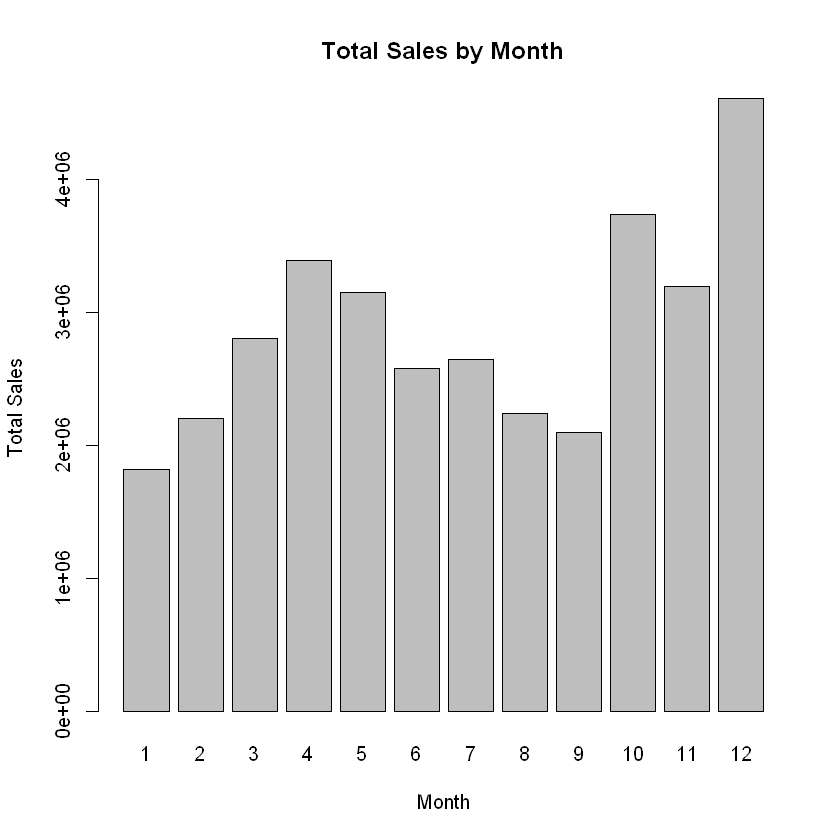

In [50]:
barplot(height = result$Total_sales , names.arg = result$Month , 
        main = "Total Sales by Month",
        xlab = "Month",
        ylab = "Total Sales") 

In [ ]:
"

->> y-axis scale : it is 1e^6

E stands for exponential , in short it is *10^

So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 1*10^6 which is same as 1,000,000


"

# 3.. Which city has max order ? 

In [51]:
head(all_data['Purchase.Address'] , 3)

Purchase.Address
<chr>
"917 1st St, Dallas, TX 75001"
"682 Chestnut St, Boston, MA 02215"
"669 Spruce St, Los Angeles, CA 90001"


In [34]:
library(stringr)

In [ ]:
### since we have used str_split() of stringr already in the last tutorial to split string ,
### let me show u one more way to do this using word()..

In [19]:
help(word)

## Extract words from a sentence

In [ ]:
"
word(string, start = 1L, end = start, sep = fixed(" "))



string = string on which u want to do manipulations

start = 1 , ie it select the first word..
        If negative, counts backwards from the last word

end = This parameter specifies the position of the last word to be extracted

sep = Separator between words. Default is single space.

"

In [53]:
args(stringr :: word)

function (string, start = 1L, end = start, sep = fixed(" ")) 
NULL

In [54]:
all_data$Purchase.Address[1]

[1] "917 1st St, Dallas, TX 75001"

In [55]:
stringr :: word(all_data$Purchase.Address[1]  , sep = ",") ## ie default index is 1

[1] "917 1st St"

In [56]:
word(all_data$Purchase.Address[1] , 2 , sep = ",")

### ie just access 2nd index data

[1] " Dallas"

In [35]:
all_data['city'] = stringr :: word(all_data$Purchase.Address ,
                                   2 , sep = ",") ## takes 2-5 sec in NEW PC

## takes 20 sec (OLD PC)

In [36]:
head(all_data , 3)

Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month,sales,city
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [ ]:
help(table)

## belongs to base package !
## Cross Tabulation and Table Creation !

In [ ]:
"

table(...,
      exclude = if (useNA == "no") c(NA, NaN),
      useNA = c("no", "ifany", "always"),
      dnn = list.names(...), deparse.level = 1)




... : This refers to the variables for which you want to create the frequency table.. 
        You can provide one or more variables separated by commas..

exclude : This parameter allows you to specify which values should be excluded from the table. 
          By default, if useNA is set to "no", it excludes NA and NaN values.
          However, you can override this behavior by specifying the values you want to exclude explicitly..

useNA : This parameter determines how NA values should be handled. It can take three values:
        "no" : Excludes NA values from the table.
        "ifany" : Includes NA values in the table if they are present.
        "always" : Treats NA values as a separate category and includes them in the table.




"

In [1]:
args(table)

function (..., exclude = if (useNA == "no") c(NA, NaN), useNA = c("no", 
    "ifany", "always"), dnn = list.names(...), deparse.level = 1) 
NULL

In [59]:
table(all_data['city']) ## returns frequency table


       Atlanta         Austin         Boston         Dallas    Los Angeles 
         14863           9890          19901          14797          29564 
 New York City       Portland  San Francisco        Seattle 
         24847          12449          44662          14713 

In [ ]:
"

Use as.data.frame.matrix() when your input is a matrix or table 
and you want to maintain the matrix structure..

Use as.data.frame() when your input is a list, a data frame-like object 
or a matrix without specific row or column names.

"

In [60]:
freq_df = as.data.frame(table(all_data['city']))

In [61]:
freq_df

Var1,Freq
<fct>,<int>
Atlanta,14863
Austin,9890
Boston,19901
Dallas,14797
Los Angeles,29564
New York City,24847
Portland,12449
San Francisco,44662
Seattle,14713


In [62]:
labels = freq_df$Var1

## freq_df[ ,'Var1']
## freq_df['Var1']

In [63]:
values = freq_df$Freq

## values = as.data.frame(table(all_data['city']))[ , "Freq"]
## values = freq_df["Freq"]

In [21]:
library(plotly)

In [22]:
args(plot_ly)

function (data = data.frame(), ..., type = NULL, name, color, 
    colors = NULL, alpha = NULL, stroke, strokes = NULL, alpha_stroke = 1, 
    size, sizes = c(10, 100), span, spans = c(1, 20), symbol, 
    symbols = NULL, linetype, linetypes = NULL, split, frame, 
    width = NULL, height = NULL, source = "A") 
NULL

In [ ]:
plotly :: plot_ly(labels = labels , values = values , type="pie")

# 4.. What product sold the most &  Why?

In [23]:
library(dplyr)

In [ ]:
help(lapply)

## lapply returns a list 

## lapply( x , fun )
## X : a vector (atomic or list) 
## FUN : the function to be applied to each element of x

In [24]:
args(lapply)

function (X, FUN, ...) 
NULL

In [ ]:
"

X : This is the list (or vector) , dataframe on which u want to apply function FUN ..

FUN : This is the function to be applied to each element of the list X..

... : These are additional arguments that can be passed to the lapply as per need..


"

In [68]:
lapply(all_data , class)  ## to understand data-types

## lapply(all_data , class) : It apply a class function to each 
## element/key of a list or each column of a data frame

$Order.ID
[1] "character"

$Product
[1] "character"

$Quantity.Ordered
[1] "integer"

$Price.Each
[1] "numeric"

$Order.Date
[1] "character"

$Purchase.Address
[1] "character"

$Month
[1] "integer"

$sales
[1] "numeric"

$city
[1] "character"

In [ ]:
"

lapply: lapply is a function in R that stands for 'list apply.''
        It is used to apply a specified function to each element of a list 
        or a vector and returns the results as a list..

So, when you run lapply(data, class), 
it takes each column of the 'data' dataframe & applies the class() function to it, 

and returns a Output as list where each element/col tells class (data type) of a column in the data object..


"

In [69]:
names(all_data)

[1] "Order.ID"         "Product"          "Quantity.Ordered" "Price.Each"      
[5] "Order.Date"       "Purchase.Address" "Month"            "sales"           
[9] "city"

In [ ]:
### in the previous session [3rd session] , we have used group_by !

In [25]:
args(group_by)

function (.data, ..., .add = FALSE, .drop = group_by_drop_default(.data)) 
NULL

In [37]:
### for every product , we have to compute total quantity order & avg price of every product..

count_df = all_data  %>% dplyr :: group_by(Product)  %>%
                    summarise(Quantity_Ordered = sum(Quantity.Ordered),
                              Avg_price = mean(Price.Each , na.rm = TRUE),
                              )


In [71]:
count_df

Product,Quantity_Ordered,Avg_price
<chr>,<int>,<dbl>
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [72]:
names(count_df)

[1] "Product"          "Quantity_Ordered" "Avg_price"

        Basic ggplot structure:
        The basic structure of a ggplot2 plot involves :
        a) specifying a data frame 
        b) mapping aesthetic properties, 
        c) and adding geometric layers(adding required plot as per our need)..
        
           The main function is ggplot():

In [3]:
# Load the ggplot2 library
library(ggplot2)

In [5]:
help(ggplot)

In [ ]:
"

ggplot(data = NULL, mapping = aes(), ..., environment = parent.frame())





    data = Dataframe on which u are running it on !

    mapping = u can mention those variables which u want to consider while considering plots
              using aes() along with u can customize x-axis , y-axis , color , size, shape etc..

    ... : This ellipsis argument allows you to pass additional arguments as per need !


    aes() (short for aesthetic) : 
    In aes() , mention variables that we want to consider while creating plots along with the customization properties
    of plots , eg : x-axis position, y-axis position, color, shape, size

"

In [26]:
args(ggplot)

function (data = NULL, mapping = aes(), ..., environment = parent.frame()) 
NULL

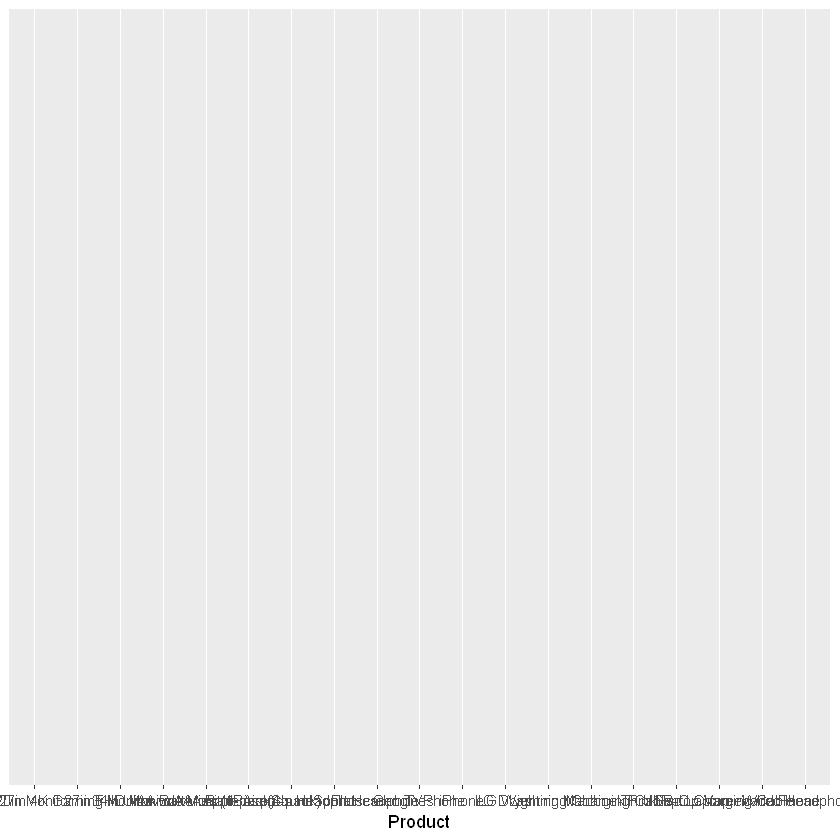

In [75]:
ggplot2 :: ggplot(count_df , aes(x = Product )) ## it returns basically ggplot object 

### aes() (short for aesthetic) : mention variables that we want to consider while creating plots 

In [ ]:
help(geom_col)

## create bar chart 

In [ ]:
"

geom_col(
  mapping = NULL,
  data = NULL,
  position = "stack",
  ...,
  just = 0.5,
  width = NULL,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)



    mapping : u can mention those variables which u want to consider while considering plots
              along with its customization properties using the aes() function
              eg x-axis position, y-axis position, color, shape, size
              aes(x = variable1, y = variable2) would map variable1 to the x-axis and variable2 to the y-axis.
              If not specified, the data from the ggplot() call is used.

    data : The data frame on which we are working.. , If not specified, the data from the ggplot() call is used..


    position : This parameter is used to create stacked-bar & grouped-bar as per need..
                ie , This parameter specifies how the bars should be positioned. 
                By default, it is set to "stack", which stacks the bars on top of each other. 
                Other options include :
                "dodge" (place the bars side by side)  , ie for grouped-bar chart !
                "fill" (stack bars and normalize each group to have the same height),
                "identity" (no stacking)


"

In [27]:
help(scale_y_continuous)

## Position scales for continuous data (x & y) , ie adjust the scale of the y-axis in a plot

In [ ]:
"
scale_x_continuous(
  name = waiver(),
  breaks = waiver(),
  minor_breaks = waiver(),
  n.breaks = NULL,
  labels = waiver(),
  limits = NULL,
  expand = waiver(),
  oob = censor,
  na.value = NA_real_,
  trans = "identity",
  guide = waiver(),
  position = "bottom",
  sec.axis = waiver()
)

name : waiver() basically means name will be automatically determined based on the data.



sec.axis : This parameter allows you to specify a secondary x-axis.. 
           By default, it's set to waiver(), meaning that no secondary axis will be shown.

"

In [10]:
args(scale_y_continuous)

### sec.axis: The secondary axis specification for the y-axis..

function (name = waiver(), breaks = waiver(), minor_breaks = waiver(), 
    n.breaks = NULL, labels = waiver(), limits = NULL, expand = waiver(), 
    oob = censor, na.value = NA_real_, trans = "identity", guide = waiver(), 
    position = "left", sec.axis = waiver()) 
NULL

In [28]:
help(sec_axis)

## Specify a secondary axis(or dual-axis) for a plot..

In [ ]:
"
sec_axis(
  trans = NULL,
  name = waiver(),
  breaks = waiver(),
  labels = waiver(),
  guide = waiver()
)



trans : This parameter allows you to specify a 
        transformation for the secondary axis. 
        For example, if you want to display the data on a logarithmic scale, you can specify trans = "log".

name : This parameter allows you to specify a 
        label or title for the secondary axis..
        It's set to waiver(), which means that the label will be automatically determined based on the data.



"

In [11]:
args(sec_axis)

### trans = The transformation function u can apply to the secondary axis

function (trans = NULL, name = waiver(), breaks = waiver(), labels = waiver(), 
    guide = waiver()) 
NULL

In [ ]:
help(theme)

In [29]:
args(theme)

function (line, rect, text, title, aspect.ratio, axis.title, 
    axis.title.x, axis.title.x.top, axis.title.x.bottom, axis.title.y, 
    axis.title.y.left, axis.title.y.right, axis.text, axis.text.x, 
    axis.text.x.top, axis.text.x.bottom, axis.text.y, axis.text.y.left, 
    axis.text.y.right, axis.ticks, axis.ticks.x, axis.ticks.x.top, 
    axis.ticks.x.bottom, axis.ticks.y, axis.ticks.y.left, axis.ticks.y.right, 
    axis.ticks.length, axis.ticks.length.x, axis.ticks.length.x.top, 
    axis.ticks.length.x.bottom, axis.ticks.length.y, axis.ticks.length.y.left, 
    axis.ticks.length.y.right, axis.line, axis.line.x, axis.line.x.top, 
    axis.line.x.bottom, axis.line.y, axis.line.y.left, axis.line.y.right, 
    legend.background, legend.margin, legend.spacing, legend.spacing.x, 
    legend.spacing.y, legend.key, legend.key.size, legend.key.height, 
    legend.key.width, legend.text, legend.text.align, legend.title, 
    legend.title.align, legend.position, legend.direction, legend.justification, 
    legend.box, legend.box.just, legend.box.margin, legend.box.background, 
    legend.box.spacing, panel.background, panel.border, panel.spacing, 
    panel.spacing.x, panel.spacing.y, panel.grid, panel.grid.major, 
    panel.grid.minor, panel.grid.major.x, panel.grid.major.y, 
    panel.grid.minor.x, panel.grid.minor.y, panel.ontop, plot.background, 
    plot.title, plot.title.position, plot.subtitle, plot.caption, 
    plot.caption.position, plot.tag, plot.tag.position, plot.margin, 
    strip.background, strip.background.x, strip.background.y, 
    strip.clip, strip.placement, strip.text, strip.text.x, strip.text.x.bottom, 
    strip.text.x.top, strip.text.y, strip.text.y.left, strip.text.y.right, 
    strip.switch.pad.grid, strip.switch.pad.wrap, ..., complete = FALSE, 
    validate = TRUE) 
NULL

    These arguments allow you to customize the appearance of different elements in a ggplot, 
    starting from axis labels , titles  , panels , legend properties and plot backgrounds.. 

In [30]:
help(element_text)

### Theme elements
## customize the appearance of text elements in plots 

In [ ]:
"
element_text(
  family = NULL,
  face = NULL,
  colour = NULL,
  size = NULL,
  hjust = NULL,
  vjust = NULL,
  angle = NULL,
  lineheight = NULL,
  color = NULL,
  margin = NULL,
  debug = NULL,
  inherit.blank = FALSE
)



angle :  angle at which the text should be rotated (in degrees).. 
         If set to NULL, it will inherit the rotation from the plot theme.


hjust : This parameter specifies the horizontal alignment of the text relative to its position..
        It ranges from 0 (left-aligned) to 1 (right-aligned). 
        If set to NULL, it will inherit the alignment from the plot theme.

"

In [12]:
args(element_text)

function (family = NULL, face = NULL, colour = NULL, size = NULL, 
    hjust = NULL, vjust = NULL, angle = NULL, lineheight = NULL, 
    color = NULL, margin = NULL, debug = NULL, inherit.blank = FALSE) 
NULL

In [33]:
help(coord_cartesian)

## xlim, ylim : Limits for the x and y axes

In [31]:
args(coord_cartesian)

function (xlim = NULL, ylim = NULL, expand = TRUE, default = FALSE, 
    clip = "on") 
NULL

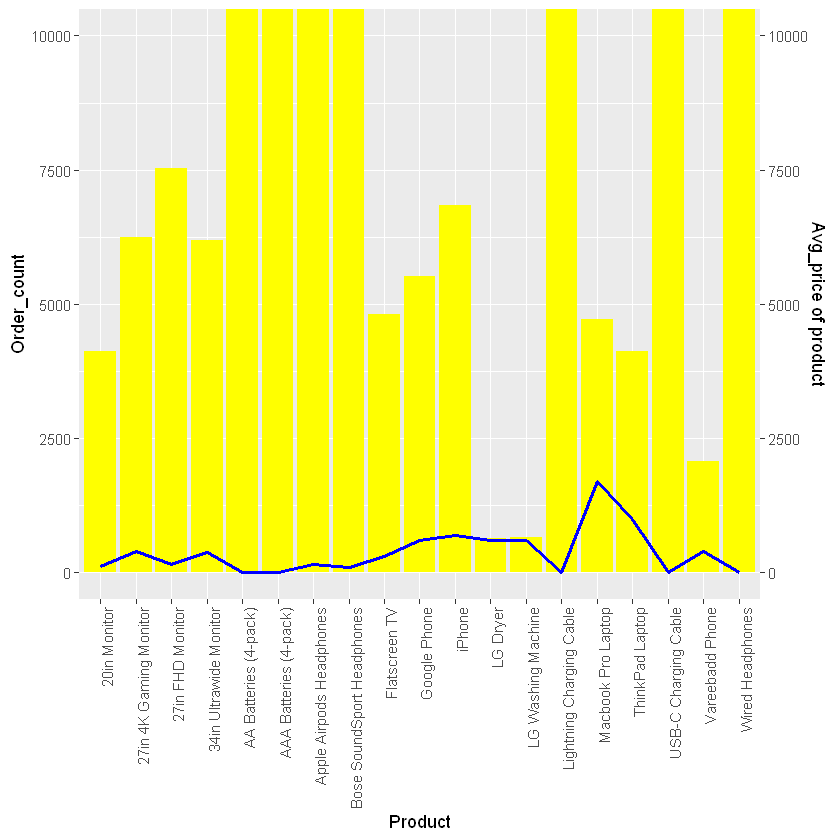

In [77]:
library(ggplot2)

# Create a ggplot object
plot = ggplot() +
  # Use geom_col instead of geom_bar to manually provide y values
  geom_col(data = count_df , aes(x = Product , y = Quantity_Ordered), fill = "yellow") +  

  geom_line(data = count_df , aes(x = Product , y = Avg_price, group = 1), color = "blue" , lwd = 1) +

  scale_y_continuous(
    sec.axis = sec_axis(~./1 ,  name = "Avg_price of product")) +

  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +

  labs(y = "Order_count", x = "Product") + 

  coord_cartesian(ylim = c(0, 10000))

# Print the plot
print(plot)


In [ ]:
"

Do add group = 1  , otherwise u will not lineplot
& u will get below warning as well :

`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?

"

In [ ]:
"

plot = ggplot(count_df, aes(x = Product )) 
It initializes the plot by specifying the data frame count_df and the "Product" on the x-axis
using the aes() function..


geom_col(data = count_df , aes(x = Product , y = Quantity_Ordered), fill = "yellow")  :
create the bar chart for 'Product' & 'Quantity Ordered'. 

Why not geom_bar() , bcz in geom_bar() u can pass either x or y, but not both..
it means in geom_bar() , if I mention parameter "x" or "y" , then it will automatically consider count for either x or y..
But by using geom_col(), you can specify both aesthetics explicitly ( both x & y)..



You can use geom_bar() instead of geom_col()
    geom_bar(aes(x = Product , y = Quantity_Ordered), stat = "identity", fill = "yellow") : 
        (in previous release of ggplot2 , it was working , but not in ggplot2 3.5.1
        create the bar chart for 'Product' & 'Quantity Ordered'. 

    stat = "identity" , The default value is "identity," meaning no transformation..
            ie , statistical transformation to be applied to the data.. 
       



geom_line(data = count_df , aes(x = Product , y = Avg_price, group = 1), color = "blue" , lwd = 1) : 
create the line chart between 'Product' & 'Avg_price'..
group = 1 means that all data points are treated as a single group, avoiding grouping issues.
lwd = 1 ( to increase linewidth of your line-plot..



scale_y_continuous(sec.axis = sec_axis(~. , name = "Avg_price of product")): 
This line sets up a secondary y-axis on the right side of the plot.. 
sec.axis: This is an parameter of the scale_y_continuous() function, which is used to specify the secondary y-axis

sec.axis = sec_axis(~. , name = "Avg_price of product") :
If u want to perform some transformation on y-axis values , u can use sec_axis function , 
so If I dont want to do any transformation , I will mention  ~. or ~./1(ie divide each value by 1 , ie no transformation)
'~' stands for "formula operator".. and let me provide ylabel as "Avg_price of product.."
ie It modify the value of 'Avg_price' on this secondary axis as per need.

Note : ~. means all the average price values or all the original values of average price 




theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8)): 
element_text(...): This function is used to specify various text-related properties for elements in the plot, 
                    such as the axis labels, titles, and text annotations.
ie It customizes the appearance of the x-axis labels. It rotates them by 90 degrees, aligns them to the right (hjust = 1), 
and sets the text size to 8..



labs(y = "Order_count", x = "Product"): 
The y-axis label is "Order_count" and the x-axis label is "Product"


coord_cartesian(ylim = c(0, 10000)) : 
In the coord_cartesian() function, I set the ylim argument to specify the y-axis limits. 


"

# 5.. Understanding Trend of the most sold product ? 

In [38]:
freq_tb = table(all_data$Product)

In [79]:
freq_tb


              20in Monitor     27in 4K Gaming Monitor 
                      4098                       6225 
          27in FHD Monitor     34in Ultrawide Monitor 
                      7498                       6174 
     AA Batteries (4-pack)     AAA Batteries (4-pack) 
                     20558                      20612 
  Apple Airpods Headphones Bose SoundSport Headphones 
                     15525                      13298 
             Flatscreen TV               Google Phone 
                      4794                       5522 
                    iPhone                   LG Dryer 
                      6840                        646 
        LG Washing Machine   Lightning Charging Cable 
                       666                      21610 
        Macbook Pro Laptop            ThinkPad Laptop 
                      4721                       4126 
      USB-C Charging Cable            Vareebadd Phone 
                     21859                       2065 
         

In [ ]:
help(sort)

## Sorting or Ordering Vectors

In [ ]:
"

sort(x, decreasing = FALSE, ...)

x :: an R object that u want to sort 

"

In [34]:
args(sort)

function (x, decreasing = FALSE, ...) 
NULL

In [39]:
most_sold_product = names(head(sort(freq_tb, decreasing = TRUE), 5))

In [40]:
most_sold_product

[1] "USB-C Charging Cable"     "Lightning Charging Cable"
[3] "AAA Batteries (4-pack)"   "AA Batteries (4-pack)"   
[5] "Wired Headphones"

In [41]:
### lets extract dataframe of most_sold_products_only..

most_sold_product_df = all_data[all_data[['Product']] %in% c('USB-C Charging Cable' ,'Lightning Charging Cable' ,'AAA Batteries (4-pack)' ,'AA Batteries (4-pack)' ,'Wired Headphones')  , ]

In [42]:
dim(most_sold_product_df)

[1] 103488      9

In [97]:
## install.packages("reshape2")

In [44]:
library(reshape2) ## to create pivot tables 

In [ ]:
help(dcast)

In [ ]:
"

data : dataframe 


formula : A formula of the form LHS ~ RHS to cast
            LHS means variable that u need on indexes
            RHS means variable that u need on column..


fun.aggregate : Should the data be aggregated before casting? 
                Default aggregation is length , ie it counts total_rows for every pair..


value.var : Name of the column whose values will be filled to cast

"

In [8]:
args(dcast)

function (data, formula, fun.aggregate = NULL, ..., margins = NULL, 
    subset = NULL, fill = NULL, drop = TRUE, value.var = guess_value(data)) 
NULL

In [ ]:
names(most_sold_product_df)

In [45]:
pivot = reshape2 :: dcast(most_sold_product_df , Month ~ Product , value.var = "Product"  ) 
## dcast(data , X ~ Y , value.var = "any_variable_here")

## pivot table is all about  , we have Rows*columns & having value in each cell !

## X - feature that I want as rows
## Y - feature that I want as columns 
## value - feature name on which u want to perform your aggregation ..
## Note : default aggregation func is length , ie it counts total_rows ..

Aggregation function missing: defaulting to length



In [ ]:
"

set fun.aggregate = length in dcast() to get rid of above warning :

Aggregation function missing: defaulting to length

"

In [87]:
pivot

Month,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
<int>,<int>,<int>,<int>,<int>,<int>
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


In [88]:
names(pivot)

[1] "Month"                    "AA Batteries (4-pack)"   
[3] "AAA Batteries (4-pack)"   "Lightning Charging Cable"
[5] "USB-C Charging Cable"     "Wired Headphones"

In [40]:
help(matplot)

## Plot the columns of one matrix against the columns of another
## create a scatter plot or line plot with multiple series of data..
## ie , It allows plot multiple lines on the same graph

In [ ]:
"

matplot(x, y, type = "p", lty = 1:5, lwd = 1, lend = par("lend"),
        pch = NULL,
        col = 1:6, cex = NULL, bg = NA,
        xlab = NULL, ylab = NULL, xlim = NULL, ylim = NULL,
        log = "", ..., add = FALSE, verbose = getOption("verbose"))




x : The x-coordinates for the plot.. 
y : The y-coordinates for the plot.. 
type : The type of plot u need , "p" for points, "l" for lines, "b" for both etc..

lty : Line type
        lty = 1: Solid line
        lty = 2: Dashed line
        lty = 3: Dotted line
        lty = 4: Dot-dashed line
        lty = 5: Long-dashed line


lwd : Line width
        lwd = 1: Thin line (default)
        lwd > 1: Thicker line
        lwd < 1: Thinner line

lend : Line end style..
        This specifies the line end style. Possible values are "round", "butt", or "square".


"

In [39]:
args(matplot)

function (x, y, type = "p", lty = 1:5, lwd = 1, lend = par("lend"), 
    pch = NULL, col = 1:6, cex = NULL, bg = NA, xlab = NULL, 
    ylab = NULL, xlim = NULL, ylim = NULL, log = "", ..., add = FALSE, 
    verbose = getOption("verbose")) 
NULL

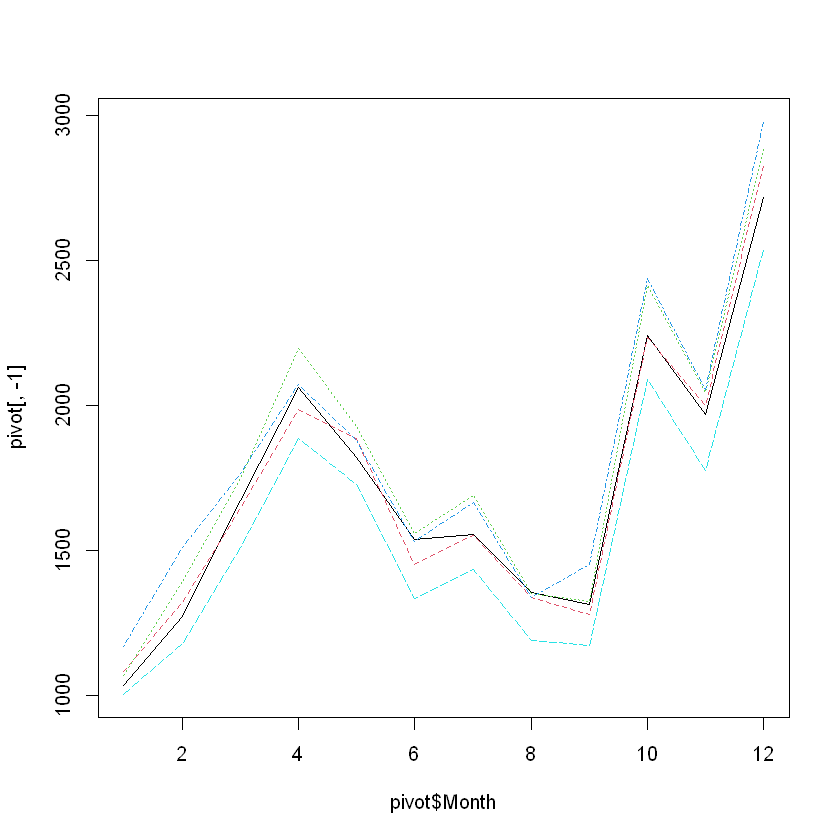

In [89]:
# Create a multiline plot
matplot(pivot$Month, pivot[, -1], type = "l")

## pivot[, -1] : gives all data except "month"
## matplot is a function of graphics package in R which is by-default loaded ->>  help(matplot)

In [ ]:
"

Inference : Products have been sold more in Apr , Oct , Nov , Dec 
These are those months where we have interesting sales ..


"

# 6.. What products are most often sold together ?
        keep orders that have same order Id, are sold mostly together ..
        Approach : ie keep duplicated data 

In [90]:
dim(all_data)

[1] 185686      9

In [91]:
head(all_data , 6)

Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month,sales,city
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [ ]:
help(duplicated)

In [ ]:
"


2.. Default S3 method:
    duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

    This is the default method of the duplicated function, suitable for most objects like vectors, data frames, etc.
    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.


    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector specifying values that should not be considered when determining duplicates.
                    Default is FALSE..

    fromLast : A logical value indicating whether to identify duplicates from the last occurrence. 
               Default is FALSE..

    nmax : An integer specifying the maximum number of duplicates to return. 
           Default is NA, meaning all duplicates are returned..

"

In [46]:
df_duplicated = all_data[duplicated(all_data$Order.ID) | duplicated(all_data$Order.ID, fromLast = TRUE), ]

## df_duplicated = all_data %>% group_by(`Order ID`) %>% filter( n() > 1 ) ## takes 5-10 sec (OLD PC)

In [ ]:
"

duplicated(all_data$Order.ID) : mark all rows as duplicates of `Order ID` except for the first occurrence.
duplicated(all_data$Order.ID, fromLast = TRUE) : mark all rows as duplicates of `Order ID` except for the last occurrence..

Note : | "OR" operator between both gives all the rows as duplicates , which is equivalent to keep="False" in Python


In other words , it returns all rows where the Order.ID is duplicated in the dataset..

"

In [47]:
head(df_duplicated , 4)

Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month,sales,city
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles


In [94]:
dim(df_duplicated)

[1] 14128     9

In [95]:
length(unique(df_duplicated$Order.ID))

### 6879 orders are duplicated ..

[1] 6879

In [ ]:
## for every Order-Id , collect all the products in a single string that User has brought ..

In [ ]:
## we have used group_by() in 4th session , 6th session of this case-study !

In [5]:
help(mutate)

## Create, modify, and delete columns

In [ ]:
"
## S3 method for class 'data.frame'
mutate(
  .data,
  ...,
  .by = NULL,
  .keep = c("all", "used", "unused", "none"),
  .before = NULL,
  .after = NULL
)






.data : This parameter represents the data frame you want to modify.

... : These are the expressions used to create or modify variables. You can specify multiple expressions separated by commas.

.by : This parameter allows you to specify grouping variables. 
        If provided, the mutations will be performed within each group defined by the unique combinations of .by variables.

.keep : This parameter determines which variables are retained in the output data frame.. 
        It has four options:

        "all" : Keep all variables.
        "used" : Keep only the variables that were used in the mutation expressions.
        "unused" : Keep only the variables that were not used in the mutation expressions.
        "none" : Do not keep any variables other than those specified in the mutation expressions.
        .before and .after : These parameters allow you to specify where the new variables should be placed in the output data
                             frame. You can provide variable names or positions before or after which the new variables 
                             should be inserted.



"

In [3]:
args(mutate)

function (.data, ...) 
NULL

In [7]:
help(paste)

## Concatenate Strings

In [6]:
args(paste)

function (..., sep = " ", collapse = NULL, recycle0 = FALSE) 
NULL

In [ ]:
"
paste (..., sep = " ", collapse = NULL, recycle0 = FALSE)



... : These are the objects to be concatenated together. 
        You can provide multiple objects separated by commas (x, y, z, etc.).

sep : This is the separator to use between the objects. 
        By default, it is set to a single space " "


collapse : This parameter specifies the separator to use between the concatenated elements of each input object. 
           If specified, it collapses the result into a single string. 
            By default, it is set to NULL, meaning no collapsing occurs.

"

In [17]:
vec1 = c("apple", "banana", "cherry")

In [18]:
paste(vec1 , sep = " ")

### concatenates the elements of vec1 together with spaces between them, resulting in a vector.

[1] "apple"  "banana" "cherry"

In [19]:
paste(vec1 , sep = " " , collapse = " ")

### It also does the same concatenation but collapses the elements into a single string with spaces between each element..

### similar output I want to achieve in this data ! (ie I want all products )

[1] "apple banana cherry"

In [ ]:
# Grouping by Order.ID
grouped_df = group_by(df_duplicated, Order.ID)

# create the Grouped_products column
dup_products_df = mutate(grouped_df, Grouped_products = paste(Product, collapse = ","))


In [ ]:
### lets write similar code using dplyr chaining , as chaining makes code more readable !
### before executing below code , make sure u have installed & imported dplyr as pipe operator is defined in dplyr package

In [96]:
dup_products_df = df_duplicated %>% group_by(Order.ID) %>% mutate(Grouped_products = paste(Product, collapse = ","))

### group data considering "Order ID" & then each join(paste) each of the product for various Order Id having sep as space " "
## & then we will collapse (convert) vector into string by collapsing by using collapse = " , " 


In [97]:
head(dup_products_df , 2)

Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month,sales,city,Grouped_products
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"


In [98]:
dim(dup_products_df) 

## Since we have collected all products that a particular Order id has brought,so lets drop these order id as they are duplicate

[1] 14128    10

In [20]:
args(duplicated)

function (x, incomparables = FALSE, ...) 
NULL

In [21]:
help(duplicated)

In [ ]:
"

duplicated(x, incomparables = FALSE, ...)

## Default S3 method:
duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

## S3 method for class 'array'
duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)






1.. duplicated(x, incomparables = FALSE, ...)
    duplicated() in R is used to identify duplicate elements in a vector, data frame or array

    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector of values that should not be considered when determining duplicates.
                    Default is FALSE..




2.. Default S3 method:
    duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

    This is the default method of the duplicated function, suitable for most objects like vectors, data frames, etc.
    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.


    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector specifying values that should not be considered when determining duplicates.
                    Default is FALSE..

    fromLast : A logical value indicating whether to identify duplicates from the last occurrence. 
               Default is FALSE..

    nmax : An integer specifying the maximum number of duplicates to return. 
           Default is NA, meaning all duplicates are returned..




3.. S3 method for class 'array':
    duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)

    This method is specifically for arrays.
    It identifies duplicates along a specific margin (dimension) of the array.


    MARGIN: An integer indicating which margin to check for duplicates. 
            Default is 1 (rows).
            columns (if MARGIN = 2)


"

In [ ]:
### since u are working dataframes , hence u can use 1st & 2nd one , as 3rd one is for "array"..

In [ ]:
### duplicated(dup_products_df$Order.ID) : return logical vector or array as "TRUE" or "FALSE"

## "TRUE" means : We have duplicated instance at that row-index 
## "FALSE" means : We do not have duplicated instance at that row-index 

In [99]:
dim(dup_products_df[duplicated(dup_products_df$Order.ID) , ])   ## data[rows , cols]

## ie 7249 Order ids are duplicated 

[1] 7249   10

In [100]:
no_dup_df = dup_products_df[!duplicated(dup_products_df$Order.ID) ,]   ## data[rows , cols]

## if u want to ignore/delete these duplicate rows , u can use negation of above filter !

In [101]:
# Calculate the frequency of unique values in the 'grouped_products' column
product_counts = table(no_dup_df$Grouped_products)

In [41]:
help(sort)

## Sorting or Ordering Vectors

In [ ]:
"

sort(x , decreasing = FALSE , ...)

x : an R object that u want to sort 

"

In [42]:
args(sort)

function (x, decreasing = FALSE, ...) 
NULL

In [102]:
top_5_products_count = head(sort(product_counts, decreasing = TRUE) , 5)

In [103]:
top_5_products_count


     iPhone,Lightning Charging Cable    Google Phone,USB-C Charging Cable 
                                 886                                  857 
             iPhone,Wired Headphones Vareebadd Phone,USB-C Charging Cable 
                                 361                                  312 
       Google Phone,Wired Headphones 
                                 303 

In [104]:
class(top_5_products_count) ## ie its a table data structure 

[1] "table"

In [ ]:
help(pie)

In [ ]:
"

pie(x, labels = names(x), edges = 200, radius = 0.8,
    clockwise = FALSE, init.angle = if(clockwise) 90 else 0,
    density = NULL, angle = 45, col = NULL, border = NULL,
    lty = NULL, main = NULL, ...)

"

In [ ]:
## Now we need values & labels to plot a pie chart , 
## as we have used as.data.frame() approach to extract values & labels in 3rd tutorial
## Lets use names() & as.vector() to extract values & labels


In [105]:
args(pie)

### pie(x , labels)

## x = values of pie
## labels = labels for pie 

function (x, labels = names(x), edges = 200, radius = 0.8, clockwise = FALSE, 
    init.angle = if (clockwise) 90 else 0, density = NULL, angle = 45, 
    col = NULL, border = NULL, lty = NULL, main = NULL, ...) 
NULL

In [106]:
names(top_5_products_count)

[1] "iPhone,Lightning Charging Cable"     
[2] "Google Phone,USB-C Charging Cable"   
[3] "iPhone,Wired Headphones"             
[4] "Vareebadd Phone,USB-C Charging Cable"
[5] "Google Phone,Wired Headphones"

In [107]:
values = as.vector(top_5_products_count)

## as.vector() => used to convert a data-structure "table" into a vector.
## The table() returns a contingency table, and as.vector() can be used to convert it to a simple vector.

In [108]:
values

[1] 886 857 361 312 303

In [ ]:
## since we have used plotly pie chart in 3rd tutorial , let me show u how u can do it using base-R !

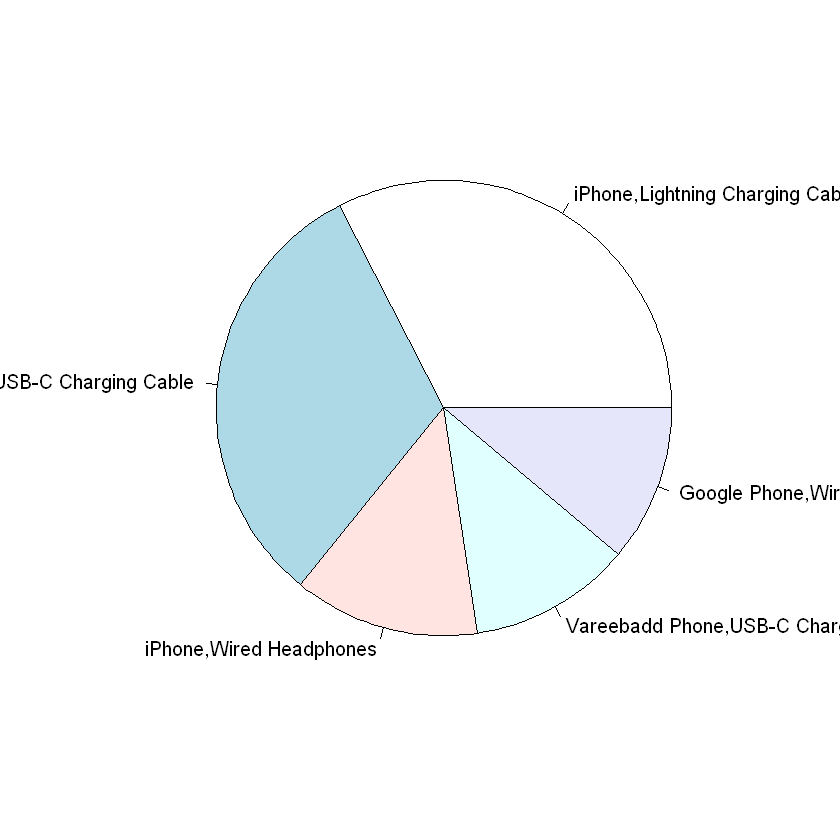

In [109]:
# Create a pie chart for the top 5 products
pie(values, labels = names(top_5_products_count))

## pie(top_5_products_count, labels = names(top_5_products_count))

In [ ]:
'''

ie as soon as any Person will bought Iphone , we can recommend him charging cable , wired headphones 
ie as soon as any Person will bought Google phone , we can recommend him USB-c charging cable


This is a very important insight if someone is building recommendation system ..

'''

# 7.. Performing Pairwise Analysis 
       In which pairs of (month, day) most of the product will get sold ..

In [110]:
head(all_data , 3)

Order.ID,Product,Quantity.Ordered,Price.Each,Order.Date,Purchase.Address,Month,sales,city
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [111]:
head(all_data$Order.Date , 5)

[1] "04/19/19 08:46" "04/07/19 22:30" "04/12/19 14:38" "04/12/19 14:38"
[5] "04/30/19 09:27"

In [112]:
class(all_data$Order.Date)

[1] "character"

In [ ]:
### it says that "date" has character(string) values , but it should have date-time values , 
### ie in context of R , these are date-time data-types of base-R : 
### it should have 'POSIXlt' ,'POSIXt' or 'Date' data-types

In [ ]:
"

In R,  there are several data types that can be used to represent dates...
R's base package provides some basic date and time classes and functions, such as Date, POSIXct, POSIXlt
)..and functions like Sys.Date(), Sys.time(), and as.Date()

1) Date: base-R
The Date data type in R is used to represent dates without a time component. 
It's suitable for applications where you only need to work with dates, such as tracking events or appointments.



2) 'POSIXlt' and 'POSIXt' of base-R
Portable Operating System Interface (POSIX) Time, List format.
These are data types that which are used to represent date and time values. 
These data types are part of the base R system and are commonly used for handling date and time-related operations


a) 'POSIXlt' (List-Based Date-Time):
'POSIXlt' : Portable Operating System Interface (POSIX) Time, List format.
ie , 'POSIXlt' stands for "List-Based Date-Time"

It represents date and time values as a list of components, including year, month, day, hour, minute, second, etc. 
Each component is stored as a separate element in the list.
'POSIXlt' objects are more flexible and provide access to individual date and time components, 
making them suitable for various date and time calculations.
They are less memory-efficient compared to 'POSIXct' because of the storage of individual components..




b) 'POSIXct' (Calendar-Based Date-Time):

POSIXct() : "Portable Operating System Interface (POSIX) , compliant date and time
POSIXct is a data type in R that represents date and time with fractional seconds..

in short , 'POSIXct' stands for "Calendar-Based Date-Time."
It represents date and time values as a numeric value, 
which is the number of seconds since the Unix epoch (January 1, 1970, at 00:00:00 UTC)..
'POSIXct' objects are more memory-efficient because they store date and time values as a single numeric value.
They are less flexible for accessing individual components directly, 
but they are faster for certain operations that involve arithmetic with date and time values.



"

In [ ]:
### as we have time component '04/19/19 08:46' , ie its good to use 'POSIXlt' or 'POSIXct'
### as "Date" data-type of base-R can deal only date values..

In [113]:
as.POSIXct("04/19/19 08:46" , format = "%m/%d/%y %H:%M") 
## convert character string into a POSIXct date-time object

## POSIXct is a data type in R that represents date and time with fractional seconds.

[1] "2019-04-19 08:46:00 IST"

In [114]:
all_data$Order.Date = as.POSIXlt(all_data$Order.Date , format = "%m/%d/%y %H:%M") ## takes 2 sec (NEW PC)

## takes 10 sec (OLD PC)

In [115]:
all_data$Order.Date[1:5]  ### values gets converted into date-time object

[1] "2019-04-19 08:46:00 IST" "2019-04-07 22:30:00 IST"
[3] "2019-04-12 14:38:00 IST" "2019-04-12 14:38:00 IST"
[5] "2019-04-30 09:27:00 IST"

In [ ]:
"
"2019-04-19 08:46:00 IST" :


"2019-04-19 08:46:00" indicates the date and time in the format "YYYY-MM-DD HH:mm:ss". Here:

"2019" is the year.
"04" is the month (April).
"19" is the day of the month.
"08:46:00" represents the time in hours, minutes, and seconds (in 24-hour format)..


Time Zone: "IST" stands for Indian Standard Time. It's the time zone used in India, which is UTC+5:30. 
            The time zone information in this case tells us that the time provided is in the Indian Standard Time zone..

            UTC + 5:30 = it means that the local time is 5 hours and 30 minutes ahead of Coordinated Universal Time(UTC)
            The "5" represents the full hours, and the "30" represents the additional 30 minutes.


"

In [116]:
class(all_data$Order.Date)

[1] "POSIXlt" "POSIXt"

In [ ]:
"

'POSIXt': Portable Operating System Interface (POSIX) Time.
Internal Representation: POSIXt is an umbrella class that includes both POSIXct and POSIXlt. 
                         It is a numeric vector representing the number of seconds since the "Epoch."

Precision: While POSIXct provides second-level precision, POSIXlt (the list format within POSIXt) offers sub-second precision, 
           storing fractions of a second





So, when you see POSIXt in R, think of it as a special type of container or structure that holds information 
about a specific point in time. It's like a box that contains all the details about a moment, 
including the year, month, day, hour, minute, and second.

For example, when you see a date and time like "2023-01-15 09:30:00," you can use a POSIXt object to store this information 
in a way that R can understand and manipulate. It helps you perform operations like comparing two dates, 
calculating durations between them, or extracting specific components like the hour or day.



"

In [119]:
## install.packages("lubridate")

In [16]:
# Load the lubridate package
library(lubridate)

## execute twice

In [49]:
help(year)

## Get/set years component of a date-time

In [48]:
"
year(x)



x : a date-time object

"

[1] "\nyear(x)\n\n"

In [45]:
args(year)

function (x) 
NULL

In [ ]:
### similarly we have month() , day() , hour() & other functions..

In [119]:

# Assuming 'Order_Date' is already converted to POSIXct format
# Extract year, month, day, hour, minute, and day_name

all_data$year = lubridate :: year(all_data$Order.Date)
all_data$month = lubridate :: month(all_data$Order.Date)
all_data$day = lubridate :: day(all_data$Order.Date)
all_data$hour = lubridate :: hour(all_data$Order.Date)
all_data$minute = lubridate ::minute(all_data$Order.Date)
all_data$day_name = weekdays(all_data$Order.Date)  ## weekdays is a base-R function 

In [ ]:
### Since we have learnt how to create frequency table or pivot table using dcast() in 5th tutorial of this case-study , 
### let me show u how to do it using groupby() + pivot_wider() approach : 

In [5]:
library(dplyr)

In [ ]:
help(group_by)

### Group by one or more variables !

In [8]:
args(group_by)

function (.data, ..., .add = FALSE, .drop = group_by_drop_default(.data)) 
NULL

In [2]:
library(tidyr)

In [3]:
help(pivot_wider)

## Pivot data from long to wide !

In [ ]:
"
pivot_wider(
  data,
  ...,
  id_cols = NULL,
  id_expand = FALSE,
  names_from = name,
  names_prefix = "",
  names_sep = "_",
  names_glue = NULL,
  names_sort = FALSE,
  names_vary = "fastest",
  names_expand = FALSE,
  names_repair = "check_unique",
  values_from = value,
  values_fill = NULL,
  values_fn = NULL,
  unused_fn = NULL
)


data : This could be a dataframe or a tibble you want to transform..

id_cols: These are the columns you want to keep as identifiers. 
         They will remain as they are, and the other columns will be spread or widened based on these identifiers.


names_from : The column whose values will become the new column names.
names_prefix : A prefix to be added to the new column names.

names_sort : If TRUE, the resulting column names will be sorted..
values_from : The column(s) from which to take the values to fill the new columns.

values_fill : A value to use for filling missing cells..
values_fn : A function to be applied to the values before spreading.

unused_fn : A function to be applied to unused factor levels..


"

In [16]:
args(tidyr :: pivot_wider)

function (data, ..., id_cols = NULL, id_expand = FALSE, names_from = name, 
    names_prefix = "", names_sep = "_", names_glue = NULL, names_sort = FALSE, 
    names_vary = "fastest", names_expand = FALSE, names_repair = "check_unique", 
    values_from = value, values_fill = NULL, values_fn = NULL, 
    unused_fn = NULL) 
NULL

In [120]:
pvt_table = all_data %>%
  dplyr :: group_by(month, day) %>% 
  dplyr :: tally() %>%  ### tells counts of possible groups.. (equivalent to python groupby size())
  tidyr :: pivot_wider(names_from = day , values_from = n)


### The categories of 'day' col values become the new column names 
## and the corresponding counts (from column n) are placed in these new columns

In [121]:
pvt_table

month,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,336,323,296,293,308,290,308,283,317,...,328,277,348,297,369,311,327,320,300,277
2,413,433,403,402,387,415,426,434,448,...,433,391,460,412,440,452,405,NA,NA,NA
3,471,525,474,471,503,471,508,481,505,...,503,545,466,473,458,503,489,491,483,466
4,605,588,599,626,611,613,570,610,616,...,550,589,629,591,578,630,591,589,627,NA
5,513,532,500,544,528,507,543,545,565,...,568,541,509,542,511,505,546,549,553,475
6,457,450,422,465,465,487,415,445,438,...,391,411,442,442,463,408,465,490,447,NA
7,476,465,467,459,451,474,451,477,466,...,496,422,436,479,476,446,473,418,446,480
8,367,389,361,383,363,402,386,381,383,...,405,374,386,390,388,392,403,399,356,419
9,384,400,379,386,357,385,375,380,397,...,362,380,389,354,385,411,372,411,379,NA


### lets do styling of dataframe using Heatmap : 

In [14]:
help(heatmap)

## Draw a Heat Map with a dendrogram added to the left side and to the top

In [ ]:
"

heatmap(x, Rowv = NULL, Colv = if(symm)"Rowv" else NULL,
        distfun = dist, hclustfun = hclust,
        reorderfun = function(d, w) reorder(d, w),
        add.expr, symm = FALSE, revC = identical(Colv, "Rowv"),
        scale = c("row", "column", "none"), na.rm = TRUE,
        margins = c(5, 5), ColSideColors, RowSideColors,
        cexRow = 0.2 + 1/log10(nr), cexCol = 0.2 + 1/log10(nc),
        labRow = NULL, labCol = NULL, main = NULL,
        xlab = NULL, ylab = NULL,
        keep.dendro = FALSE, verbose = getOption("verbose"), ...)



x : numeric matrix of the values to be plotted..


"

In [124]:
args(heatmap)

## heatmap belongs to base-R stats package !
## x : numeric matrix of the values to be plotted..

function (x, Rowv = NULL, Colv = if (symm) "Rowv" else NULL, 
    distfun = dist, hclustfun = hclust, reorderfun = function(d, 
        w) reorder(d, w), add.expr, symm = FALSE, revC = identical(Colv, 
        "Rowv"), scale = c("row", "column", "none"), na.rm = TRUE, 
    margins = c(5, 5), ColSideColors, RowSideColors, cexRow = 0.2 + 
        1/log10(nr), cexCol = 0.2 + 1/log10(nc), labRow = NULL, 
    labCol = NULL, main = NULL, xlab = NULL, ylab = NULL, keep.dendro = FALSE, 
    verbose = getOption("verbose"), ...) 
NULL

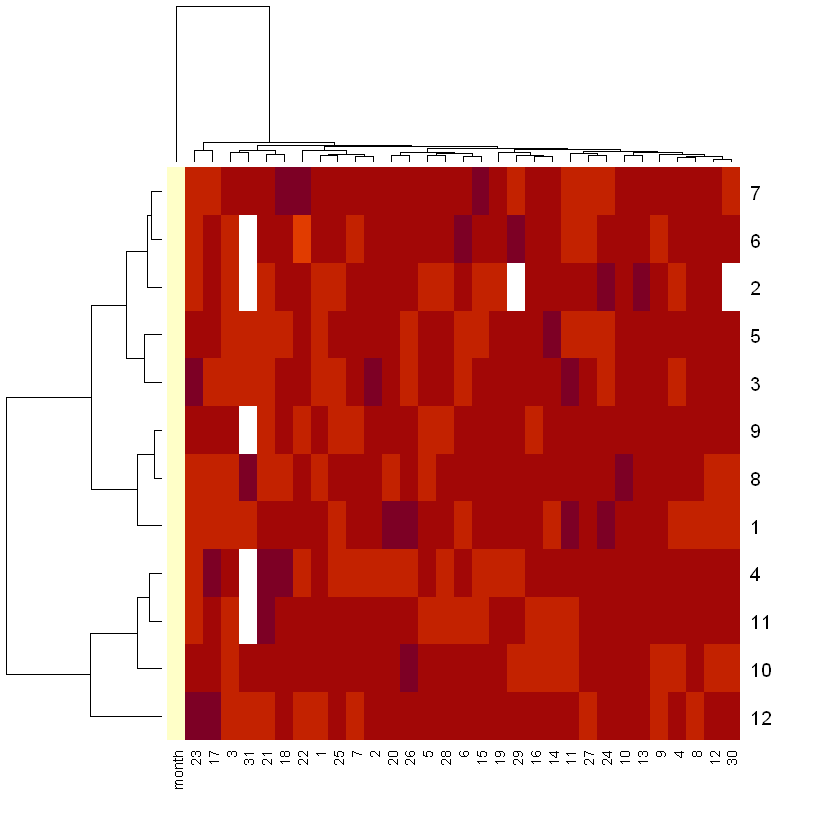

In [125]:
heatmap(as.matrix(pvt_table))

## as x receives I/p in matrix  , ie we have to pass as.matrix(pvt_table)

In [ ]:
## Above one doesn't sound interactive , If u want interactive plot , u can use plotly !

In [137]:
## install.packages("plotly")


  There is a binary version available but the source version is later:
       binary source needs_compilation
plotly 4.10.1 4.10.2             FALSE



installing the source package 'plotly'




In [11]:
# Load required libraries
library(plotly)

## execute twice..

In [12]:
args(plot_ly)

function (data = data.frame(), ..., type = NULL, name, color, 
    colors = NULL, alpha = NULL, stroke, strokes = NULL, alpha_stroke = 1, 
    size, sizes = c(10, 100), span, spans = c(1, 20), symbol, 
    symbols = NULL, linetype, linetypes = NULL, split, frame, 
    width = NULL, height = NULL, source = "A") 
NULL

In [13]:
help(plot_ly)

## Initiate a plotly visualization

In [ ]:
"


From chatgpt[explain z parameter in context of heatmap] : 

z : This parameter represents the numeric values that will determine the color intensity at each point in the heatmap..
    In summary , z is the data you're visualizing in the heatmap, where each value corresponds to a cell's color intensity 
    in the heatmap grid..


"

In [ ]:
? plotly :: layout

## help(plotly :: layout) => will not work..

## This function is used to set layout properties for the plot or Modify the layout of a plotly visualization

In [ ]:
"

From official documentation : 

layout(p, ..., data = NULL)

p = plotly graph object

"

In [ ]:
"

from chatgpt : 
Here's a summary of the layout() function and some of its commonly used parameters : 

layout(
  title = NULL,
  xaxis = NULL,
  yaxis = NULL,
  annotations = NULL,
  legend = NULL,
  margin = NULL,
  hovermode = NULL,
  barmode = NULL,
  plot_bgcolor = NULL,
  paper_bgcolor = NULL,
  ...
)


"

In [ ]:
args(plotly :: layout)

### as we have layout in base-R as well , that's why it is good to use plotly :: layout !

        p : This is typically a plotly object (e.g., the result of a plot_ly() call). 
            The layout function is applied to this plotly object to customize plot 

        ... : This ellipsis (...) is telling , it can receive multiple arguments.. 
              In case of the layout function, it allows you to pass those parameters 
              which can customize title, axis labels, annotations, etc.

In [ ]:
"

heatmap = plotly :: plot_ly(z = as.matrix(pvt_table), type = "heatmap")

fig = layout(heatmap ,     
    xaxis = list(title = "days"),
    yaxis = list(title = "months"),
    title = "Interactive Heatmap Title")

fig

"

### lets apply dplyr chaining to make it more interactive !
### Make sure u have imported dplyr , bcz %>%(pipe) operator is defined in this package..

In [ ]:


# Create a heatmap using plotly
plotly :: plot_ly(z = as.matrix(pvt_table), type = "heatmap") %>%
  layout(
    xaxis = list(title = "days"),
    yaxis = list(title = "months"),
    title = "Interactive Heatmap Title" 
      
  )

## "z" parameter is used to specify the values that will be plotted on the heatmap !
## plot_ly() expects a matrix for the "z" parameter , thats why we have to use as.matrix() 


### in the last month [Oct , Nov , Dec], we have higher no of Order !

In [ ]:
"

z = as.matrix(pivot_table) specifies the data for the heatmap. pivot_table is assumed to be a data frame, 
    and as.matrix() converts it to a matrix suitable for creating a heatmap..

type = "heatmap" specifies that we want to create a heatmap.


"